In [176]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import GridSearchCV

Data Collection & Processing

In [177]:
exercise = pd.read_csv('exercise.csv')
calories = pd.read_csv('calories.csv')

In [178]:
calories_data = pd.concat([exercise, calories['Calories']], axis=1)
calories_data.head() 

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [179]:
calories_data.shape

(15000, 9)

In [180]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [181]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Exploratory Data Analysis

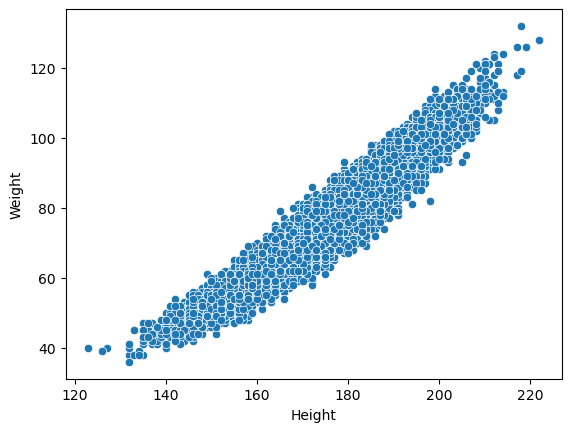

In [182]:
sb.scatterplot(x='Height', y='Weight', data=calories_data)
plt.show()

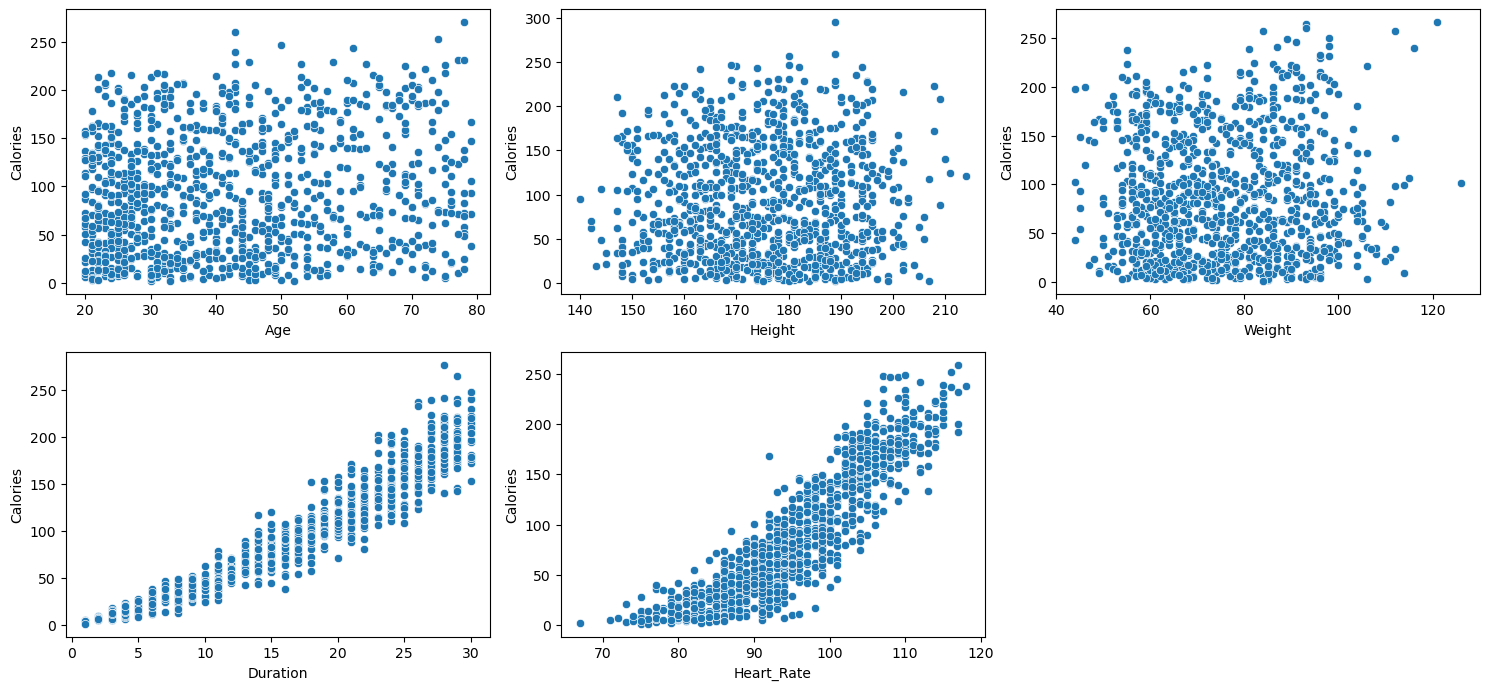

In [183]:
features = ['Age', 'Height', 'Weight', 'Duration','Heart_Rate']

plt.subplots(figsize=(15, 10))

for i, col in enumerate(features):
    plt.subplot(3, 3, i + 1)
    x = calories_data.sample(1000)
    sb.scatterplot(data=x, x=col, y='Calories')
    
plt.tight_layout()
plt.show()

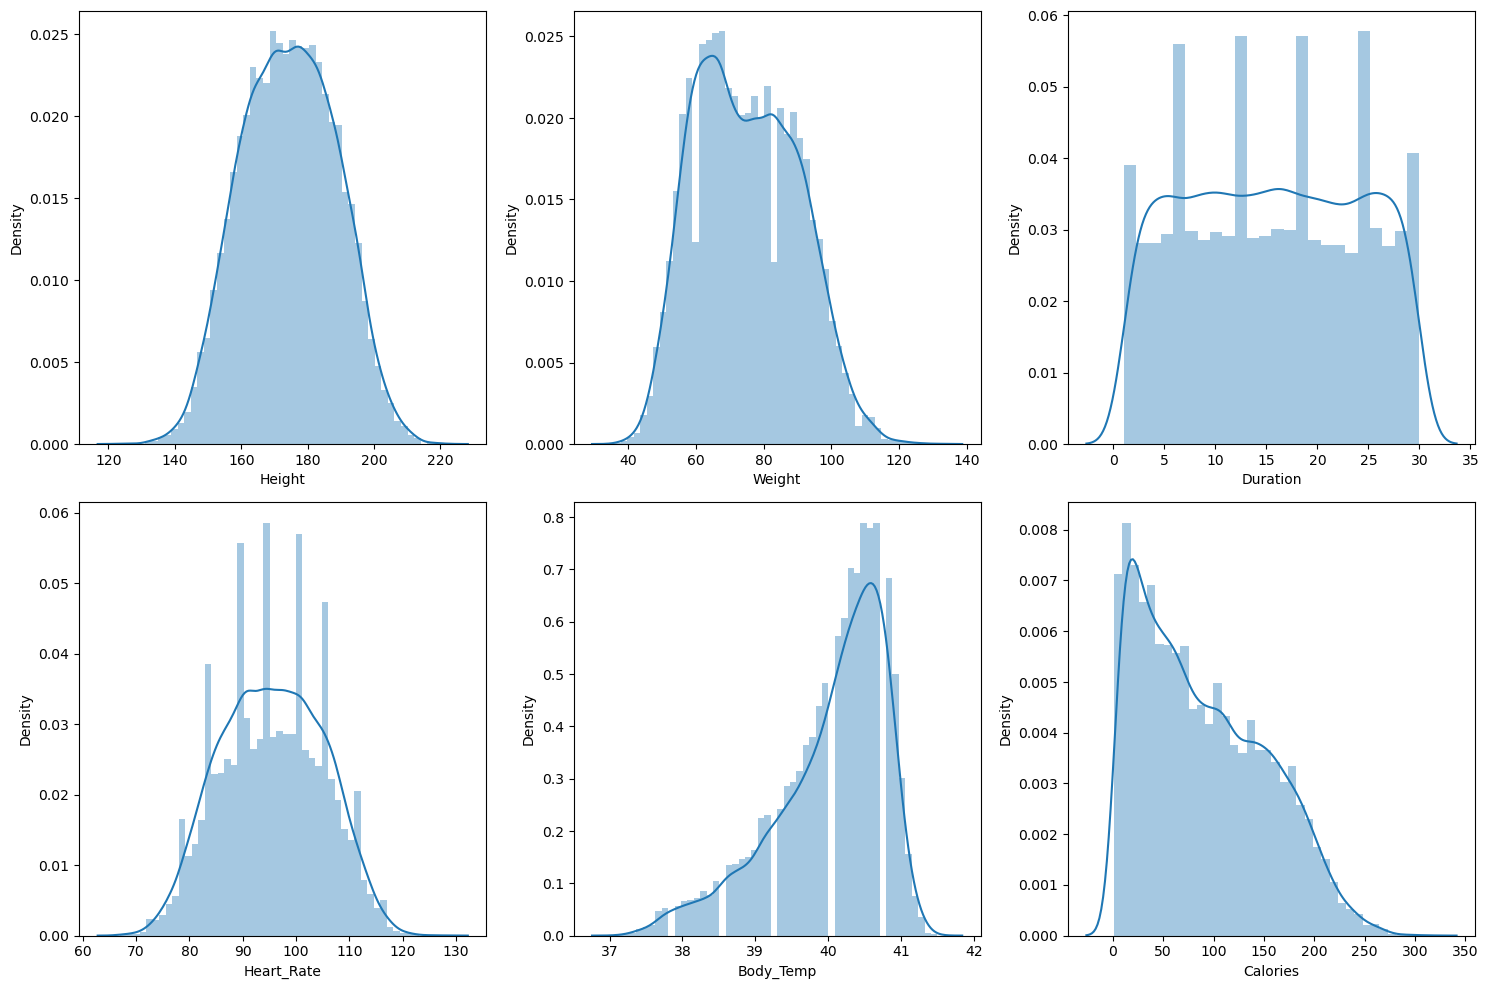

In [184]:
features = calories_data.select_dtypes(include='float').columns 

plt.subplots(figsize=(15, 10)) 
for i, col in enumerate(features): 
	plt.subplot(2, 3, i + 1) 
	sb.distplot(calories_data[col]) 
plt.tight_layout() 
plt.show() 

In [185]:
calories_data.replace({'male': 0, 'female': 1}, 
		inplace=True) 
calories_data.head() 

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


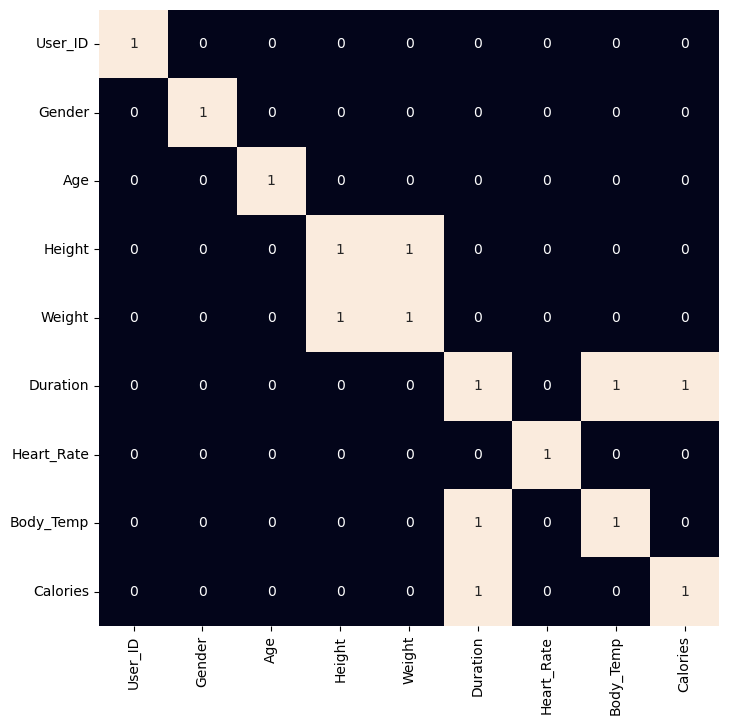

In [186]:
plt.figure(figsize=(8, 8)) 
sb.heatmap(calories_data.corr() > 0.9, 
		annot=True, 
		cbar=False) 
plt.show() 

Model Training

In [187]:
features = calories_data.drop(['User_ID', 'Calories','Height'], axis=1) 
target = calories_data['Calories'].values 

X_train, X_val,Y_train, Y_val = train_test_split(features, target, test_size=0.2, random_state=42) 
X_train.shape, X_val.shape 

((12000, 6), (3000, 6))

In [188]:
# Normalizing the features for stable and fast training. 
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_val = scaler.transform(X_val)

In [189]:
calories_data.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [190]:
model_dict={
    'log':LinearRegression(),
    'DT':DecisionTreeRegressor(),
    'RF':RandomForestRegressor(),
    'XGBR':XGBRegressor(),
}

In [191]:
dt_regressor = DecisionTreeRegressor()
linear_regressor = LinearRegression()
XGB_regressor = XGBRegressor()
RF_regressor =RandomForestRegressor()

#calculate r2_score and mean absolute error for validation and testing values

def model_scorer(model_name, model, features, target):
    output = []
    output.append(model_name)
    
    X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.20, random_state=42)
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    train_pred = model.predict(X_train)
    
    output.append(round(r2_score(y_val, y_pred), 5))
    output.append(round(mae(y_val, y_pred), 5))
    output.append(round(r2_score(y_train, train_pred), 5))
    output.append(round(mae(y_train, train_pred), 5))
    
    return output

In [192]:
model_dict={
    'Linear Regression':linear_regressor,
    'Decision Tree':dt_regressor,
    'Random Forest':RF_regressor,
    'XGB Regressor':XGB_regressor,
}

In [193]:
model_output = []

for model_name, model in model_dict.items():
    model_output.append(model_scorer(model_name, model, features, target))

In [194]:
# r2_score and mean absolute error for validation and testing values
model_output

[['Linear Regression', 0.96711, 8.47052, 0.96706, 8.32229],
 ['Decision Tree', 0.99368, 3.29367, 1.0, 0.0],
 ['Random Forest', 0.99833, 1.65425, 0.99971, 0.65127],
 ['XGB Regressor', 0.99895, 1.43919, 0.99956, 0.95971]]

Decision Tree - Hyperparameter Tuning

In [195]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [196]:
grid_search = GridSearchCV(dt_regressor, param_grid, cv=5)
grid_search.fit(features, target)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [197]:
best_params = grid_search.best_params_
print("Best Hyperparameters for Decision Tree:", best_params)

Best Hyperparameters for Decision Tree: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5}


Decision Tree - Finalization

In [198]:
best_dt_regressor = DecisionTreeRegressor(max_depth=30, min_samples_split=2, min_samples_leaf=2)


In [199]:
best_dt_regressor.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=30, min_samples_leaf=2)

In [200]:
y_pred = best_dt_regressor.predict(X_val)

In [201]:
print("Decision Tree Mean Squared Error:", mae(Y_val,y_pred))

Decision Tree Mean Squared Error: 3.243916666666667


In [202]:
print("Decision Tree Mean Squared Error:", r2_score(Y_val,y_pred))

Decision Tree Mean Squared Error: 0.9939141332029174


Linear Regression - Hyperparameter Tuning

In [203]:
param_grid = {'copy_X': [True, False], 'fit_intercept': [True, False], 'n_jobs': [None, 1, 2], 'positive': [False, True]}

In [204]:
grid_search = GridSearchCV(linear_regressor, param_grid, cv=5)
grid_search.fit(features, target)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [None, 1, 2],
                         'positive': [False, True]})

In [205]:
best_params = grid_search.best_params_
print("Best Hyperparameters for Linear Regression:", best_params)

Best Hyperparameters for Linear Regression: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


Linear Regression - Finalization

In [206]:
best_linear_regressor = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, positive=False)


In [207]:
best_linear_regressor.fit(X_train, Y_train)

LinearRegression()

In [208]:
y_pred_tuned = best_linear_regressor.predict(X_val)

In [209]:
print("Linear Regression Mean Squared Error:", mae(Y_val, y_pred_tuned))

Linear Regression Mean Squared Error: 8.47051996529244


In [210]:
print("Linear Regression Mean Squared Error:", r2_score(Y_val, y_pred_tuned))

Linear Regression Mean Squared Error: 0.9671099046646914
